In [1]:
from helper import *
import warnings
warnings.filterwarnings('ignore')

import pandas as pd

In [2]:
fo = pd.ExcelFile('cleaned2012.xls') 
# clean-data.xlsx
df = pd.read_excel(fo, 'Sheet1')
print(df)

                                                   text
0     pengembangan jaringan komputer universitas sur...
1     penggunaan aplikasi multimedia pembelajaran to...
2     evaluasi keamanan akses jaringan komputer nirk...
3     evaluasi implementasi keamanan jaringan virtua...
4     efektivitas pemanfaatan media audio visual alt...
5     analisa perancangan server voip voice internet...
6     deteksi pencegahan flooding data jaringan komp...
7     pembangunan jaringan local area network smp ne...
8     analisis perancangan jaringan komputer sekolah...
9     analisis jaringan komputer dinas komunikasi in...
10           redesain jaringan komputer metode top down
11                        dasar dasar jaringan komputer
12    pengembangan media pembelajaran topologi jarin...
13    sistem monitoring spesifikasi utilitas host ja...
14    implementasi sistem otentikasi pengguna jaring...
15    sistem monitoring jaringan server linux sms ga...
16    pembangunan sistem informasi pengisian sur

In [3]:
#drop empty line
df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

text = df['text']
text_list =  [i.split() for i in text]
print(len(text_list))
print(text_list[:1])

6500
[['pengembangan', 'jaringan', 'komputer', 'universitas', 'surakarta', 'perbandingan', 'protokol', 'routing', 'information', 'protokol', 'rip', 'protokol', 'open', 'shortest']]


In [4]:
#Create Biagram & Trigram Models 
from gensim.models import Phrases
# Add bigrams and trigrams to docs, minimum count 5 means only that appear 5 times or more.
bigram = Phrases(text_list, min_count=5)
trigram = Phrases(bigram[text_list], min_count=5)

for idx in range(len(text_list)):
    for token in bigram[text_list[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            text_list[idx].append(token)
    for token in trigram[text_list[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            text_list[idx].append(token)
            
print(text_list)

[['pengembangan', 'jaringan', 'komputer', 'universitas', 'surakarta', 'perbandingan', 'protokol', 'routing', 'information', 'protokol', 'rip', 'protokol', 'open', 'shortest', 'jaringan_komputer', 'jaringan_komputer', 'jaringan_komputer'], ['penggunaan', 'aplikasi', 'multimedia', 'pembelajaran', 'topologi', 'jaringan', 'komputer', 'macromedia', 'flash', 'hasil', 'belajar', 'mata', 'pelajaran', 'jaringan_komputer', 'macromedia_flash', 'hasil_belajar', 'mata_pelajaran', 'jaringan_komputer', 'macromedia_flash', 'hasil_belajar', 'mata_pelajaran', 'jaringan_komputer', 'macromedia_flash', 'hasil_belajar', 'mata_pelajaran'], ['evaluasi', 'keamanan', 'akses', 'jaringan', 'komputer', 'nirkabel', 'kasus', 'kantor', 'pusat', 'fakultas', 'teknik', 'universitas', 'gadjah', 'mada', 'jaringan_komputer', 'fakultas_teknik', 'jaringan_komputer', 'fakultas_teknik', 'jaringan_komputer', 'fakultas_teknik'], ['evaluasi', 'implementasi', 'keamanan', 'jaringan', 'virtual', 'private', 'network', 'vpn', 'studi',

In [5]:
phrasedf = pd.DataFrame(text_list)
print(phrasedf)

                  0                1             2               3   \
0       pengembangan         jaringan      komputer     universitas   
1         penggunaan         aplikasi    multimedia    pembelajaran   
2           evaluasi         keamanan         akses        jaringan   
3           evaluasi     implementasi      keamanan        jaringan   
4        efektivitas      pemanfaatan         media           audio   
5            analisa      perancangan        server            voip   
6            deteksi       pencegahan      flooding            data   
7        pembangunan         jaringan         local            area   
8           analisis      perancangan      jaringan        komputer   
9           analisis         jaringan      komputer           dinas   
10          redesain         jaringan      komputer          metode   
11             dasar            dasar      jaringan        komputer   
12      pengembangan            media  pembelajaran        topologi   
13    

In [6]:
from gensim import corpora, models
# Create a dictionary representation of the documents.
dictionary = corpora.Dictionary(text_list)
dictionary.filter_extremes(no_below=1, no_above=0.5)
print(dictionary)

Dictionary(9387 unique tokens: ['information', 'jaringan', 'jaringan_komputer', 'komputer', 'open']...)


In [7]:
#build bag of words (corpus)
bow = [dictionary.doc2bow(doc) for doc in text_list]

print(len(bow))
# print(doc_term_matrix[100])

# calculate TF-IDF
tfidf = models.TfidfModel(bow)
corpus_tfidf = tfidf[bow]
# similarity = pd.DataFrame(corpus_tfidf, columns=['Topic']).to_csv("similarity.csv")

# print(corpus_tfidf)

# feature_names = tfidf.get_feature_names()
# corpus_index = [n for n in corpus_tfidf]

# showme = pd.DataFrame(tfs.T.todense(), index=feature_names, columns=corpus_index)
# print(showme)

# for i in corpus_tfidf:
#     result = pd.DataFrame()
#     result = result.append(pd.Series(corpus_tfidf), ignore_index=True)
#     print(result)

6500


In [8]:
import numpy as np
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel
from gensim.corpora.dictionary import Dictionary
from numpy import array
#function to compute coherence values
def compute_coherence_values(dictionary, corpus, texts, limit, start, step):
    coherence_values = []
    np.random.seed(9)
    model_list = []
    num_topics = []
    for num_topics in range(start, limit, step):
        model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, iterations=100)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
        
    return model_list, coherence_values

# num_topics

In [9]:
start=2
limit=20
step=2
model_list, coherence_values = compute_coherence_values(dictionary, corpus=corpus_tfidf, 
                                                        texts=text_list, start=start, limit=limit, step=step)

In [10]:
#show graphs
import matplotlib.pyplot as plt
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

<Figure size 640x480 with 1 Axes>

In [11]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 10))

Num Topics = 2  has Coherence Value of 0.3537117823
Num Topics = 4  has Coherence Value of 0.4479662839
Num Topics = 6  has Coherence Value of 0.4888877475
Num Topics = 8  has Coherence Value of 0.4695331572
Num Topics = 10  has Coherence Value of 0.5007239301
Num Topics = 12  has Coherence Value of 0.4968852232
Num Topics = 14  has Coherence Value of 0.5131389781
Num Topics = 16  has Coherence Value of 0.5068396716
Num Topics = 18  has Coherence Value of 0.5058408444


In [12]:
from pprint import pprint

model = LdaModel(corpus=corpus_tfidf, id2word=dictionary, num_topics=14)
pprint(model.print_topics())

[(0,
  '0.017*"perangkat_mobile" + 0.012*"konsep_alokasi" + 0.009*"peta" + '
  '0.008*"framework_codeigniter" + 0.007*"sistem_informasi" + '
  '0.007*"penjualan_pembelian" + 0.005*"pembelian" + '
  '0.005*"pendukung_keputusan" + 0.005*"studi_kasus" + 0.005*"kota_bandung"'),
 (1,
  '0.020*"sistem_informasi" + 0.012*"pengembangan_media" + '
  '0.008*"problem_learning" + 0.007*"informasi" + 0.007*"macromedia_flash" + '
  '0.007*"siswa_kelas" + 0.006*"tubuh_manusia" + 0.006*"smartphone_android" + '
  '0.006*"flash" + 0.006*"open_source"'),
 (2,
  '0.019*"analisis_perancangan" + 0.017*"sistem_operasi" + 0.011*"e_learning" '
  '+ 0.009*"android" + 0.009*"sistem_pakar" + 0.007*"aplikasi" + '
  '0.006*"operasi" + 0.006*"analisis" + 0.005*"sistem_informasi" + '
  '0.005*"perancangan"'),
 (3,
  '0.013*"sistem_informasi" + 0.013*"sistem_pendukung" + 0.012*"smk_negeri" + '
  '0.011*"information_system" + 0.007*"aljabar" + 0.006*"studi_kasus" + '
  '0.006*"pendidikan_teknik" + 0.006*"sms_gateway" +

In [13]:
model = LdaModel(corpus=corpus_tfidf, id2word=dictionary, num_topics=14)

for idx, topic in model.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

Topic: 0 Word: 0.017*"perangkat_lunak" + 0.009*"regresi" + 0.009*"basis_pengetahuan" + 0.007*"sistem_pakar" + 0.006*"expert_system" + 0.006*"max" + 0.005*"kota_bandung" + 0.005*"lunak" + 0.005*"studi_kasus" + 0.005*"instansi_pemerintah"
Topic: 1 Word: 0.021*"sistem_pakar" + 0.012*"rancang_bangun" + 0.009*"penyelesaian" + 0.009*"perpustakaan_digital" + 0.008*"pakar" + 0.008*"linier" + 0.008*"mendiagnosa_penyakit" + 0.006*"penyakit" + 0.006*"rancang" + 0.006*"aplikasi"
Topic: 2 Word: 0.023*"sistem_operasi" + 0.009*"aljabar" + 0.009*"operasi" + 0.008*"telepon_selular" + 0.006*"interaktif" + 0.006*"media_pembelajaran" + 0.006*"atas" + 0.005*"basis_data" + 0.005*"jawa_tengah" + 0.005*"windows"
Topic: 3 Word: 0.017*"sistem_informasi" + 0.010*"visual_basic" + 0.008*"graf" + 0.008*"penjualan" + 0.007*"toko" + 0.006*"e_commerce" + 0.006*"linier" + 0.006*"aplikasi" + 0.006*"informasi" + 0.006*"tubuh_manusia"
Topic: 4 Word: 0.014*"e_learning" + 0.011*"kota_depok" + 0.011*"hasil_belajar" + 0.011*"

# Dominant topic and its percentage contribution in each document

In [14]:
def format_topics_sentences(ldamodel=None, corpus=bow, texts=text):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        # check notes 28/9
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(model, corpus=bow, texts=text_list)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['No_Dokumen', 'Topik_Dominan', 'Persentase_Kontribusi', 'Kata_Kunci', 'Teks']
df_dominant_topic.head(247)

,No_Dokumen,Topik_Dominan,Persentase_Kontribusi,Kata_Kunci,Teks
0,0,9.0,0.3091,"sistem_informasi, prestasi_belajar, matematika...","[pengembangan, jaringan, komputer, universitas..."
1,1,9.0,0.4191,"sistem_informasi, prestasi_belajar, matematika...","[penggunaan, aplikasi, multimedia, pembelajara..."
2,2,8.0,0.4710,"sistem_pendukung, smp_negeri, pendukung, keput...","[evaluasi, keamanan, akses, jaringan, komputer..."
3,3,11.0,0.5867,"sistem_informasi, perguruan_tinggi, php_mysql,...","[evaluasi, implementasi, keamanan, jaringan, v..."
4,4,4.0,0.6308,"e_learning, kota_depok, hasil_belajar, konsep_...","[efektivitas, pemanfaatan, media, audio, visua..."
5,5,11.0,0.9578,"sistem_informasi, perguruan_tinggi, php_mysql,...","[analisa, perancangan, server, voip, voice, in..."
6,6,13.0,0.9071,"pengembangan_media, makassar, animasi, d, eige...","[deteksi, pencegahan, flooding, data, jaringan..."
7,7,7.0,0.5579,"proses_thread, penjadwalan_cpu, objek_wisata, ...","[pembangunan, jaringan, local, area, network, ..."
8,8,11.0,0.3812,"sistem_informasi, perguruan_tinggi, php_mysql,...","[analisis, perancangan, jaringan, komputer, se..."
9,9,9.0,0.6672,"sistem_informasi, prestasi_belajar, matematika...","[analisis, jaringan, komputer, dinas, komunika..."


In [15]:
# Generate dataframe from list and write to xlsx.
pd.DataFrame(df_dominant_topic, columns=['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']).to_excel('topics.xls', header=True, index=False)

In [16]:
count_topics = df_dominant_topic['Topik_Dominan'].value_counts()
count_topics

11.0    896
8.0     691
1.0     572
9.0     569
3.0     536
12.0    448
5.0     441
6.0     378
2.0     344
13.0    336
7.0     329
10.0    322
0.0     319
4.0     319
Name: Topik_Dominan, dtype: int64

In [17]:
# matplotlib inline

Text(0.5,1,'Persebaran Banyak Judul Penelitian Berdasarkan Topik')

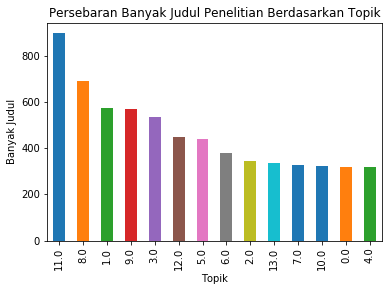

In [18]:
count_topics.plot.bar()

plt.xlabel('Topik')
plt.ylabel('Banyak Judul')
plt.title('Persebaran Banyak Judul Penelitian Berdasarkan Topik')

# The most representative sentence for each topic

In [19]:
# Display setting to show more characters in column
# Mallet
pd.options.display.max_colwidth = 100

sent_topics_sorteddf = pd.DataFrame()
sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf = pd.concat([sent_topics_sorteddf, 
                                             grp.sort_values(['Perc_Contribution'], ascending=False).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Text"]

# Show
sent_topics_sorteddf.head(20)

,Topic_Num,Topic_Perc_Contrib,Keywords,Representative Text
0,0.0,0.9613,"perangkat_lunak, regresi, basis_pengetahuan, sistem_pakar, expert_system, max, kota_bandung, lun...","[fuzzy, logic, neural, network, genetic, algorithm, knowledge, expert, system, computational, in..."
1,1.0,0.9536,"sistem_pakar, rancang_bangun, penyelesaian, perpustakaan_digital, pakar, linier, mendiagnosa_pen...","[metode, forward, chaining, teorema, bayes, sistem, pakar, diagnosa, penyakit, tulang, web, meto..."
2,2.0,0.9558,"sistem_operasi, aljabar, operasi, telepon_selular, interaktif, media_pembelajaran, atas, basis_d...","[otentifikasi, jaringan, wireless, wired, squid, proxy, ldap, sistem, operasi, linux, ubuntu, ja..."
3,3.0,0.9578,"sistem_informasi, visual_basic, graf, penjualan, toko, e_commerce, linier, aplikasi, informasi, ...","[implementasi, web, service, sistem, pelayanan, perijinan, terpadu, satu, atap, pemerintah, kota..."
4,4.0,0.9454,"e_learning, kota_depok, hasil_belajar, konsep_alokasi, model_pembelajaran, sistem_informasi, sma...","[perkembangan, telematika, penggunaan, e, media, komputer, pembangunan, sistem, e, learning, ger..."
5,5.0,0.9613,"sistem_informasi, information_system, rekayasa_perangkat, sekolah_menengah, framework_codeignite...","[perancangan, aplikasi, sistem, penetuan, pemintaan, siswa, minat, kemampuan, akademik, siswa, w..."
6,6.0,0.9596,"tour_travel, ponsel_android, android, sistem_operasi, studi_kasus, aplikasi, tour, siswa_kelas, ...","[aplikasi, pendukung, keputusan, logika, fuzzy, studi, kasus, penentuan, spesifikasi, komputer, ..."
7,7.0,0.9596,"proses_thread, penjadwalan_cpu, objek_wisata, thread, dua, perangkat_ajar, penjadwalan, spectrum...","[analisis, perubahan, penggunaan, lahan, non, permukiman, permukiman, aplikasi, penginderaan, ja..."
8,8.0,0.9668,"sistem_pendukung, smp_negeri, pendukung, keputusan, sistem_informasi, studi_kasus, keputusan_pem...","[sistem, pendukung, keputusan, pemilihan, karyawan, berprestasi, pertamina, pengapon, semarang, ..."
9,9.0,0.9656,"sistem_informasi, prestasi_belajar, matematika_siswa, sma_negeri, wisata, studi_kasus, matematik...","[fuzzy, inference, system, metode, tsukamoto, pemberi, saran, pemilihan, konsentrasi, studi, kas..."


In [20]:
import gensim
import pyLDAvis.gensim;pyLDAvis.enable_notebook()

data = pyLDAvis.gensim.prepare(model, corpus_tfidf, dictionary)
print(data)
pyLDAvis.save_html(data, 'lda-gensim-2012.html')

PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
8     -0.181429 -0.075701       1        1  9.742577
11    -0.078955  0.127780       2        1  9.135782
9     -0.082977 -0.019781       3        1  8.364569
3      0.002579  0.087881       4        1  8.040635
5     -0.003526 -0.021914       5        1  7.462838
1      0.046411  0.054481       6        1  7.389399
12    -0.012877  0.052601       7        1  7.183294
6      0.028038 -0.110987       8        1  6.659983
0      0.068669  0.024128       9        1  6.338278
7      0.045370  0.035396      10        1  6.135994
4      0.034910 -0.027403      11        1  6.067601
13     0.033386 -0.014241      12        1  6.053102
10     0.034881 -0.038953      13        1  5.774026
2      0.065520 -0.073287      14        1  5.651916, topic_info=     Category        Freq                 Term       Total  loglift  logprob
term                            

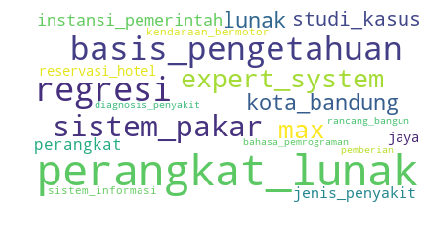

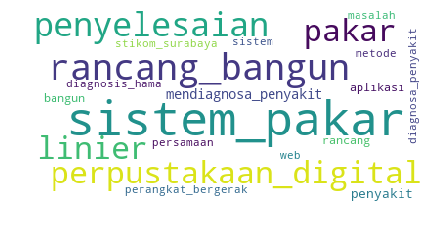

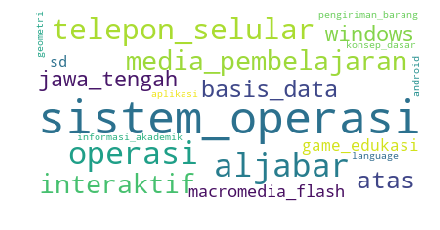

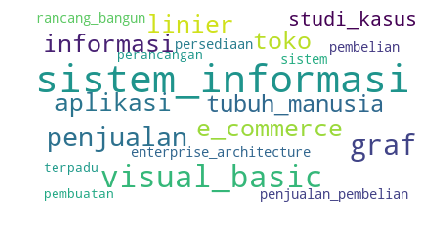

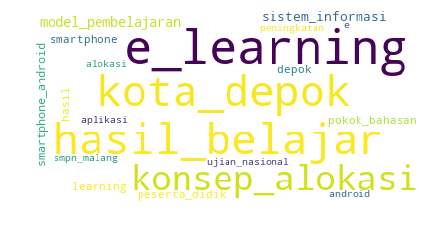

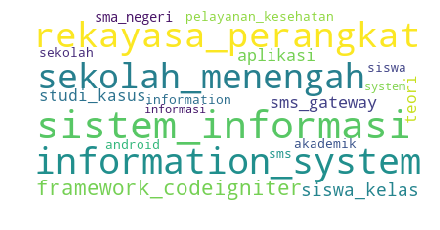

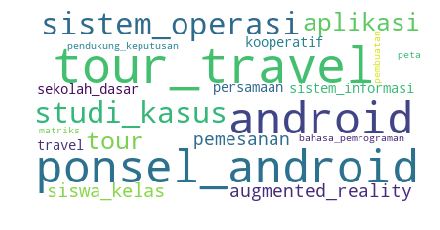

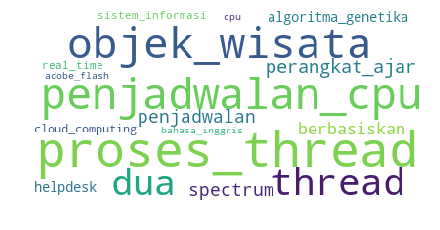

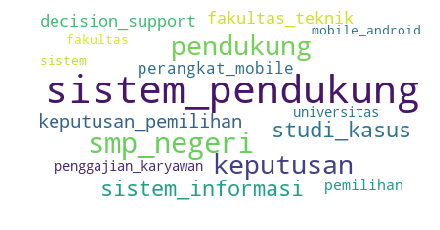

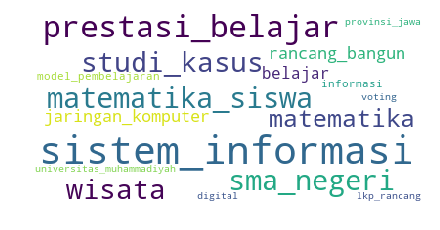

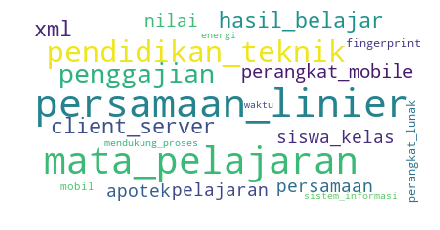

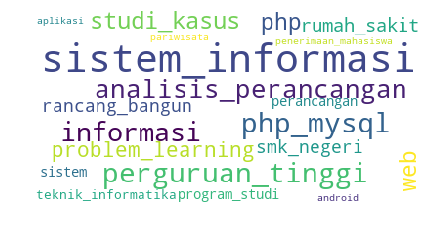

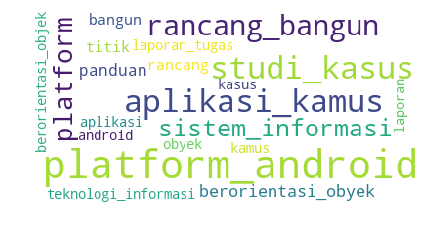

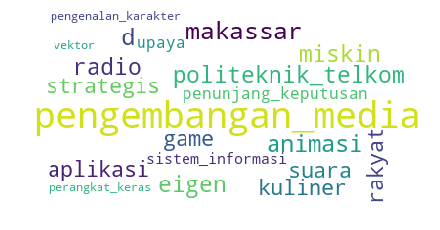

In [21]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud as wd

# # lower max_font_size, change the maximum number of word and lighten the background:
# wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
# plt.figure()
# plt.imshow(wordcloud, interpolation="bilinear")
# plt.axis("off")
# plt.show()

for t in range(model.num_topics):
    plt.figure(figsize=(7,6))
    plt.imshow(wd(max_font_size=50, max_words=20, background_color="white", min_font_size=10).fit_words(dict(model.show_topic(t,200))))
    plt.axis("off")
#     plt.title("Topic #" + str(t))
#     plt.savefig("wcld-topic-"+str(t)+".png", facecolor='k')
#     plt.tight_layout(pad=0)
    plt.savefig("wcld-topic-"+str(t)+".png", facecolor='none', bbox_inches='tight')
    
# plt.show()

In [22]:
import pickle
filename = 'model2012.pkl'
pickle.dump(model, open(filename, 'wb'))
model.save('lda.model')